### Load in the data

In [50]:
## Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#


In [51]:
compas_data = pd.read_csv('compas-scores-raw.csv')
compas_data_info = compas_data.info()
compas_data_head = compas_data.head()
compas_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15624 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

Person_ID  AssessmentID  Case_ID Agency_Text LastName FirstName  \
0          50844         57167    51950    PRETRIAL   Fisher     Kevin   
1          50844         57167    51950    PRETRIAL   Fisher     Kevin   
2          50844         57167    51950    PRETRIAL   Fisher     Kevin   
3          50848         57174    51956    PRETRIAL  KENDALL     KEVIN   
4          50848         57174    51956    PRETRIAL  KENDALL     KEVIN   
...          ...           ...      ...         ...      ...       ...   
60838      65667         79665    72038   Probation     West     James   
60839      65667         79665    72038   Probation     West     James   
60840      68603         79669    72042    PRETRIAL     Ryan   Michael   
60841      68603         79669    72042    PRETRIAL     Ryan   Michael   
60842      68603         79669    72042    PRETRIAL     Ryan   Michael   

      MiddleName Sex_Code_Text  Ethnic_Code_Text DateOfBirth  ...  \
0            NaN          Male         Caucasian    12/05/92  ...   
1            NaN          Male         Caucasian    12/05/92  ...   
2            NaN          Male         Caucasian    12/05/92  ...   
3            NaN          Male         Caucasian    09/16/84  ...   
4            NaN          Male         Caucasian    09/16/84  ...   
...          ...           ...               ...         ...  ...   
60838        NaN          Male  African-American    06/21/64  ...   
60839        NaN          Male  African-American    06/21/64  ...   
60840        NaN          Male         Caucasian    02/06/85  ...   
60841        NaN          Male         Caucasian    02/06/85  ...   
60842        NaN          Male         Caucasian    02/06/85  ...   

       RecSupervisionLevel             RecSupervisionLevelText Scale_ID  \
0                        1                                 Low        7   
1                        1                                 Low        8   
2                        1                                 Low       18   
3                        1                                 Low        7   
4                        1                                 Low        8   
...                    ...                                 ...      ...   
60838                    3  Medium with Override Consideration        8   
60839                    3  Medium with Override Consideration       18   
60840                    1                                 Low        7   
60841                    1                                 Low        8   
60842                    1                                 Low       18   

                     DisplayText RawScore DecileScore ScoreText  \
0               Risk of Violence    -2.08           4       Low   
1             Risk of Recidivism    -1.06           2       Low   
2      Risk of Failure to Appear    15.00           1       Low   
3               Risk of Violence    -2.84           2       Low   
4             Risk of Recidivism    -1.50           1       Low   
...                          ...      ...         ...       ...   
60838         Risk of Recidivism     0.16           8      High   
60839  Risk of Failure to Appear    35.00          10      High   
60840           Risk of Violence    -2.75           2       Low   
60841         Risk of Recidivism    -0.34           5    Medium   
60842  Risk of Failure to Appear    16.00           2       Low   

      AssessmentType  IsCompleted IsDeleted  
0                New            1         0  
1                New            1         0  
2                New            1         0  
3                New            1         0  
4                New            1         0  
...              ...          ...       ...  
60838            New            1         0  
60839            New            1         0  
60840            New            1         0  
60841            New            1         0  
60842            New            1         0  

[60843 rows x 28 columns]

In [52]:
compas_data['DateOfBirth'] = pd.to_datetime(compas_data['DateOfBirth'], errors='coerce')
compas_data['Screening_Date'] = pd.to_datetime(compas_data['Screening_Date'], errors='coerce')
drop = ['Person_ID', 'AssessmentID', 'Case_ID', 'LastName', 'FirstName', 'MiddleName', 
                   'ScaleSet_ID', 'Scale_ID']
compas_data_cleaned = compas_data.drop(columns=drop)
compas_data_info_cleaned = compas_data_cleaned.info()
compas_data_head_cleaned = compas_data_cleaned.head()
print(compas_data_cleaned.isnull().sum())
compas_data_cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Agency_Text              60843 non-null  object        
 1   Sex_Code_Text            60843 non-null  object        
 2   Ethnic_Code_Text         60843 non-null  object        
 3   DateOfBirth              60843 non-null  datetime64[ns]
 4   ScaleSet                 60843 non-null  object        
 5   AssessmentReason         60843 non-null  object        
 6   Language                 60843 non-null  object        
 7   LegalStatus              60843 non-null  object        
 8   CustodyStatus            60843 non-null  object        
 9   MaritalStatus            60843 non-null  object        
 10  Screening_Date           60843 non-null  datetime64[ns]
 11  RecSupervisionLevel      60843 non-null  int64         
 12  RecSupervisionLevelText  60843 n

Agency_Text Sex_Code_Text  Ethnic_Code_Text DateOfBirth  \
0        PRETRIAL          Male         Caucasian  1992-12-05   
1        PRETRIAL          Male         Caucasian  1992-12-05   
2        PRETRIAL          Male         Caucasian  1992-12-05   
3        PRETRIAL          Male         Caucasian  1984-09-16   
4        PRETRIAL          Male         Caucasian  1984-09-16   
...           ...           ...               ...         ...   
60838   Probation          Male  African-American  2064-06-21   
60839   Probation          Male  African-American  2064-06-21   
60840    PRETRIAL          Male         Caucasian  1985-02-06   
60841    PRETRIAL          Male         Caucasian  1985-02-06   
60842    PRETRIAL          Male         Caucasian  1985-02-06   

                 ScaleSet AssessmentReason Language LegalStatus CustodyStatus  \
0      Risk and Prescreen           Intake  English    Pretrial   Jail Inmate   
1      Risk and Prescreen           Intake  English    Pretrial   Jail Inmate   
2      Risk and Prescreen           Intake  English    Pretrial   Jail Inmate   
3      Risk and Prescreen           Intake  English    Pretrial   Jail Inmate   
4      Risk and Prescreen           Intake  English    Pretrial   Jail Inmate   
...                   ...              ...      ...         ...           ...   
60838  Risk and Prescreen           Intake  English    Pretrial   Jail Inmate   
60839  Risk and Prescreen           Intake  English    Pretrial   Jail Inmate   
60840  Risk and Prescreen           Intake  English    Pretrial   Jail Inmate   
60841  Risk and Prescreen           Intake  English    Pretrial   Jail Inmate   
60842  Risk and Prescreen           Intake  English    Pretrial   Jail Inmate   

      MaritalStatus Screening_Date  RecSupervisionLevel  \
0            Single     2013-01-01                    1   
1            Single     2013-01-01                    1   
2            Single     2013-01-01                    1   
3           Married     2013-01-01                    1   
4           Married     2013-01-01                    1   
...             ...            ...                  ...   
60838        Single     2014-12-31                    3   
60839        Single     2014-12-31                    3   
60840        Single     2014-12-31                    1   
60841        Single     2014-12-31                    1   
60842        Single     2014-12-31                    1   

                  RecSupervisionLevelText                DisplayText  \
0                                     Low           Risk of Violence   
1                                     Low         Risk of Recidivism   
2                                     Low  Risk of Failure to Appear   
3                                     Low           Risk of Violence   
4                                     Low         Risk of Recidivism   
...                                   ...                        ...   
60838  Medium with Override Consideration         Risk of Recidivism   
60839  Medium with Override Consideration  Risk of Failure to Appear   
60840                                 Low           Risk of Violence   
60841                                 Low         Risk of Recidivism   
60842                                 Low  Risk of Failure to Appear   

       RawScore  DecileScore ScoreText AssessmentType  IsCompleted  IsDeleted  
0         -2.08            4       Low            New            1          0  
1         -1.06            2       Low            New            1          0  
2         15.00            1       Low            New            1          0  
3         -2.84            2       Low            New            1          0  
4         -1.50            1       Low            New            1          0  
...         ...          ...       ...            ...          ...        ...  
60838      0.16            8      High            New            1          0  
60839     35.00           10      High

In [53]:
compas_data_cleaned.loc[compas_data_cleaned.ScoreText.isna()==True]

Agency_Text Sex_Code_Text  Ethnic_Code_Text DateOfBirth  \
1837     PRETRIAL          Male  African-American  2071-11-28   
4033     PRETRIAL          Male         Caucasian  1995-12-22   
6603    Probation        Female          Hispanic  1981-01-16   
6604    Probation        Female          Hispanic  1981-01-16   
7173     PRETRIAL          Male  African-American  1993-10-12   
7174     PRETRIAL          Male  African-American  1993-10-12   
9519     PRETRIAL          Male  African-American  2055-09-17   
9520     PRETRIAL          Male  African-American  2055-09-17   
10318    PRETRIAL          Male         Caucasian  2068-02-06   
11686    PRETRIAL          Male         Caucasian  2063-12-15   
13096   Probation          Male         Caucasian  1990-09-28   
13152    PRETRIAL        Female         Caucasian  2062-09-05   
13153    PRETRIAL        Female         Caucasian  2062-09-05   
13663    PRETRIAL        Female         Caucasian  1976-05-14   
13761    PRETRIAL          Male         Caucasian  1989-03-30   
13762    PRETRIAL          Male         Caucasian  1989-03-30   
15907   Probation          Male  African-American  2071-12-19   
16513    PRETRIAL          Male         Caucasian  1983-01-25   
17100   Probation          Male         Caucasian  1989-06-15   
17101   Probation          Male         Caucasian  1989-06-15   
17362   Probation          Male  African-American  2070-01-10   
18358   Probation          Male         Caucasian  2064-10-13   
18811   Probation          Male         Caucasian  1975-02-12   
21286   Probation          Male          Hispanic  1978-05-01   
23152    PRETRIAL        Female             Other  2064-03-11   
23563    PRETRIAL          Male  African-American  1996-11-15   
24769   Probation          Male          Hispanic  1990-07-02   
27876    PRETRIAL          Male          Hispanic  2070-08-29   
27877    PRETRIAL          Male          Hispanic  2070-08-29   
28068   Probation          Male  African-American  1975-01-13   
28069   Probation          Male  African-American  1975-01-13   
28929    PRETRIAL        Female         Caucasian  2055-11-26   
28930    PRETRIAL        Female         Caucasian  2055-11-26   
32407   Probation          Male         Caucasian  1990-01-22   
34414   Probation          Male          Hispanic  2069-07-18   
34429   Probation        Female  African-American  1977-08-28   
35683   Probation          Male         Caucasian  2050-01-17   
36025   Probation          Male          Hispanic  1992-11-16   
37747   Probation        Female  African-American  1995-09-20   
41419   Probation          Male  African-American  2044-09-13   
44902   Probation          Male  African-American  2060-04-02   
46078   Probation          Male          Hispanic  2073-01-27   
55354    PRETRIAL          Male  African-American  1991-08-29   
55381    PRETRIAL          Male  African-American  1994-05-06   
60385    PRETRIAL          Male             Other  1991-12-17   

                 ScaleSet AssessmentReason Language          LegalStatus  \
1837   Risk and Prescreen           Intake  English             Pretrial   
4033   Risk and Prescreen           Intake  English             Pretrial   
6603   Risk and Prescreen           Intake  English                Other   
6604   Risk and Prescreen           Intake  English                Other   
7173   Risk and Prescreen           Intake  English             Pretrial   
7174   Risk and Prescreen           Intake  English             Pretrial   
9519   Risk and Prescreen           Intake  English             Pretrial   
9520   Risk and Prescreen           Intake  English             Pretrial   
10318  Risk and Prescreen           Intake  English             Pretrial   
11686  Risk and Prescreen           Intake  English             Pretrial   
13096  Risk and Prescreen           Intake  English        Post Sentence   
13152  Risk and Prescreen           Intake  English             Pretrial   
13153  Risk and Prescreen  

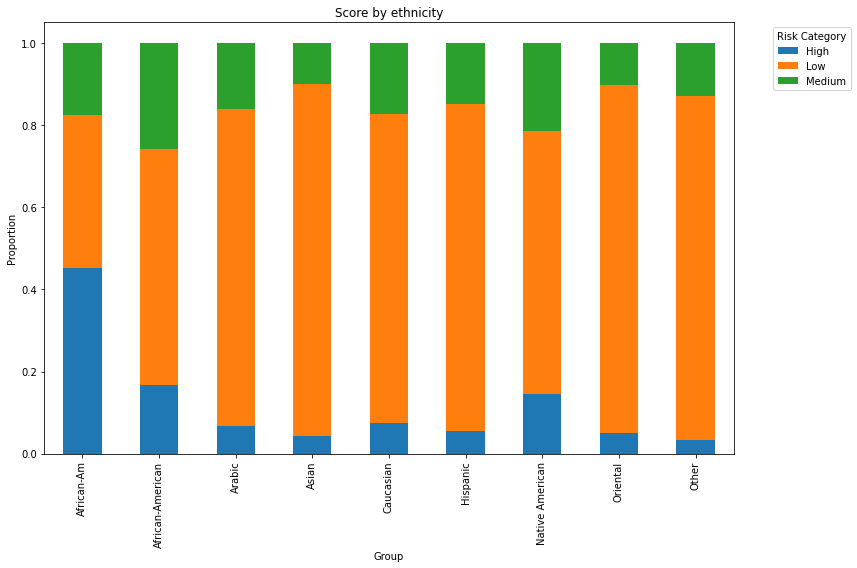

In [54]:
chart_data = compas_data_cleaned.groupby('Ethnic_Code_Text')['ScoreText'].value_counts(normalize=True).unstack()

chart_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Score by ethnicity')
plt.xlabel('Group')
plt.ylabel('Proportion')
plt.legend(title='Risk Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [55]:
# Dropping rows with missing values since all missing values are in target variable

compas_data_cleaned=compas_data_cleaned.dropna()
birthyear=compas_data_cleaned["DateOfBirth"].apply(lambda x:x.year)
dummycols1=['Sex_Code_Text','Ethnic_Code_Text',
           'Language','LegalStatus','CustodyStatus',
           'MaritalStatus','DisplayText']
compas_data_analysis1=pd.get_dummies(compas_data_cleaned,columns=dummycols1,drop_first=True)
compas_data_analysis1['BirthYear']=birthyear
# score=np.where(compas_data_analysis1.ScoreText=='Low',0,
#                np.where(compas_data_analysis1.ScoreText=='Medium',1,2))
score=np.where(compas_data_analysis1.ScoreText=='High',1,0)
compas_data_analysis1=compas_data_analysis1.drop(columns=['DateOfBirth','IsCompleted',
                                                          'IsDeleted','Screening_Date',
                                                          'AssessmentReason','Agency_Text',
                                                          'ScaleSet','RecSupervisionLevelText',
                                                          'DecileScore','ScoreText',
                                                          'AssessmentType','RecSupervisionLevel'])
compas_data_analysis1.columns

Index(['RawScore', 'Sex_Code_Text_Male', 'Ethnic_Code_Text_African-American',
       'Ethnic_Code_Text_Arabic', 'Ethnic_Code_Text_Asian',
       'Ethnic_Code_Text_Caucasian', 'Ethnic_Code_Text_Hispanic',
       'Ethnic_Code_Text_Native American', 'Ethnic_Code_Text_Oriental',
       'Ethnic_Code_Text_Other', 'Language_Spanish',
       'LegalStatus_Deferred Sentencing', 'LegalStatus_Other',
       'LegalStatus_Parole Violator', 'LegalStatus_Post Sentence',
       'LegalStatus_Pretrial', 'LegalStatus_Probation Violator',
       'CustodyStatus_Parole', 'CustodyStatus_Pretrial Defendant',
       'CustodyStatus_Prison Inmate', 'CustodyStatus_Probation',
       'CustodyStatus_Residential Program', 'MaritalStatus_Married',
       'MaritalStatus_Separated', 'MaritalStatus_Significant Other',
       'MaritalStatus_Single', 'MaritalStatus_Unknown',
       'MaritalStatus_Widowed', 'DisplayText_Risk of Recidivism',
       'DisplayText_Risk of Violence', 'BirthYear'],
      dtype='object')

In [56]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn import metrics
from sklearn.model_selection import KFold

kf=KFold(n_splits=10)
compas_data_analysis1=compas_data_analysis1.apply(lambda x: x.apply(lambda y: 1 if y else 0))
X_train, X_test, y_train, y_test=train_test_split(compas_data_analysis1,
                                                  score,
                                                  test_size=0.33,
                                                  random_state=0)
clf=RF(random_state=0)
lamb=np.arange(1,round(compas_data_analysis1.shape[1]/2))
GCV=GridSearchCV(clf,param_grid={'max_features':lamb},
                 scoring='accuracy',cv=5)
GCV.fit(X_train,y_train)
max_feats=GCV.best_params_['max_features']
max_feats

3

In [57]:
clf=RF(max_features=max_feats,random_state=0)
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
cvscore=cross_val_score(clf,X_test,y_test,cv=10)
score,cvscore

(0.8853668261562998,
 array([0.88589935, 0.88490284, 0.8854011 , 0.88340807, 0.88634098,
        0.88584247, 0.88584247, 0.88584247, 0.88584247, 0.88334995]))

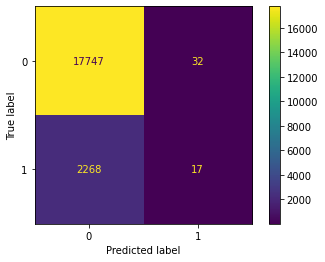

In [58]:
preds=clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,preds)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                          display_labels = [0, 1])
cm_display.plot()

In [47]:
import numpy as np
from scipy.special import expit
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestClassifier


class WCRF:
    def __init__(self, n_trees=100, s=2, gamma=1, labda=1, tree_max_depth=None, combination=1, data_name=None, random_state=None):
        # build a random forest using sklearn RandomForestClassifier
        self.n_trees = n_trees
        self.s = s
        self.labda = labda
        self.gamma = gamma
        self.combination = combination
        self.data_name = data_name
        self.w = np.ones(n_trees)/n_trees
        self.model = RandomForestClassifier(n_estimators=n_trees, max_depth=tree_max_depth, random_state=random_state)
        
        
    def fit(self, X, y):
        # fit the model with training set
        self.model.fit(X,y)
        self.classes = self.model.classes_
        self.n_classes = len(self.classes)
        #################################################################################################
        #################################################################################################

        
        # calculate number of sample in each leave for every tree
        trees = self.model.estimators_
        self.leaves_sample_count = []
        for tree in trees:
            leaves_dict = {}
            n_nodes = tree.tree_.node_count
            children_left = tree.tree_.children_left
            children_right = tree.tree_.children_right
            value = tree.tree_.value.reshape((-1, self.n_classes))
            for i in range(n_nodes):
                is_leaf = (children_left[i] == children_right[i])
                if is_leaf:
                    leaves_dict[i] = value[i]
                    
            self.leaves_sample_count.append(leaves_dict)
        
        # get regions
        regions = self.model.apply(X)
#         regions = list(set(tuple(region) for region in regions))
        
        # create sample number counter dictionary for each region
        self.regions_sample_count = dict()
        sample_count_array = np.zeros((len(regions), self.n_trees,self.n_classes))
        
        # initialize sample counter for each region, the key is a region presented by tuple, the value is a ndarray
        for i in range(len(regions)):
            region = tuple(regions[i])
            self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))   
            
        # build sample counter for each region
            for t in range(self.n_trees):
                self.regions_sample_count[region][t] = self.leaves_sample_count[t][region[t]]
                sample_count_array[i][t] = self.leaves_sample_count[t][region[t]]

        self.regions_pred_info = dict()

        return 
        

    def fit_w(self, X, y):
        alpha = 10
        beta = 2
        p_intervals = []
        # get falling leaves for each sample in every tree, return array (n_sample * number_trees)
        valid_regions = self.model.apply(X)
        
        for i in range(len(valid_regions)):
            region=tuple(valid_regions[i])
            if region not in self.regions_pred_info.keys():
                self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))
                for t in range(self.n_trees):
                    self.regions_sample_count[region][t] = self.leaves_sample_count[t][region[t]]
                self.regions_pred_info[region] = self.treat_region(region)
            pred_info = self.regions_pred_info[region]
            p_intervals.append(pred_info[3])
            
        p_intervals = np.array(p_intervals)
        p_infs = p_intervals[:,:,0]
        p_sups = p_intervals[:,:,1]

        if self.combination==1:
            k_under = (p_infs>=0.5)+0
            k_over = (p_sups>0.5)+0
        if self.combination==2:
            k_under = p_infs
            k_over = p_sups
        
        def cost_func(w, labda=self.labda, gamma=self.gamma):
            bels = (k_under*w).sum(axis=1)
            pls = (k_over*w).sum(axis=1)
            u_under = expit(alpha*(bels- 0.5))
            u_over = expit(alpha*(pls - 0.5))
            u = expit(beta*(bels - 0.5)*(pls - 0.5))

            cost = -sum(y*np.log(u_under+0.0001) + (1-y)*np.log(1-u_over+0.0001) + gamma*np.log(1-u+0.0001))/len(y) + 0.5*labda*sum(w**2)

            return cost


        def jac(w,labda=self.labda, gamma=self.gamma):
            bels = (k_under*w).sum(axis=1)
            pls = (k_over*w).sum(axis=1)
            u_under = expit(alpha*(bels- 0.5))
            u_over = expit(alpha*(pls - 0.5))
            u = expit(beta*(bels - 0.5)*(pls - 0.5))
            
            der_1 = -alpha*(y*(1-u_under))@k_under
            der_2 = alpha*((1-y)*u_over)@k_over
            der_3 = beta*(k_under.T@(u.reshape((len(y),1))*k_over) + k_over.T@(u.reshape((len(y),1))*k_under))@w - 0.5*u@(k_under+k_over)

            der_j = (der_1 + der_2 + gamma*der_3)/len(y) + labda*w
            
            return der_j
        
        cons = [{'type': 'eq', 'fun':lambda w: sum(w)-1}]

        bounds = [(0,1)] * self.n_trees
        
        w0 = np.random.rand(self.n_trees)
        res = minimize(cost_func, w0, method='SLSQP',jac=jac, constraints=cons, bounds=bounds)
        self.w = res.x
        return
        
        
    def treat_region(self, region):
        sample_count = self.regions_sample_count[region]
        sample_count[:,0] = sample_count[:,0] + sample_count[:,1]
        
        p_intervals = np.zeros_like(sample_count)
        
        p_intervals[:,0] = sample_count[:,1]/(sample_count[:,0] + self.s)
        p_intervals[:,1] = (sample_count[:,1] + self.s)/(sample_count[:,0] + self.s)

        
        # predict
        if self.combination==1:
            k_under = (p_intervals[:,0]>=0.5)+0
            k_over = (p_intervals[:,1]>0.5)+0
            bel = round(sum(k_under*self.w),4)
            pl = round(sum(k_over*self.w),4)
            
        if self.combination==2:
            bel = round(sum(p_intervals[:,0]*self.w),4)
            pl = round(sum(p_intervals[:,1]*self.w),4)
        
        if bel >= 0.5:
            prediction = self.classes[1]
        elif pl <= 0.5:
            prediction = self.classes[0]
        else:
            prediction = -1

        return (prediction, bel, pl, p_intervals, sample_count)

        
    def predict(self, X, plot=False):
        count = 0
        # intitialize prediciton list
        predictions = np.zeros(len(X))
        pred_intervals = []
        p_intervals = []
        # get falling leaves for each sample in every tree, return array (n_sample * number_trees)
        test_regions = self.model.apply(X)
        
        for i in range(len(test_regions)):
            region=tuple(test_regions[i])
            if region not in self.regions_pred_info.keys() or True:
                self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))
                for j in range(self.n_trees):
                    self.regions_sample_count[region][j] = self.leaves_sample_count[j][region[j]]
                self.regions_pred_info[region] = self.treat_region(region)
#                 pred_info = self.treat_region(region)
                count += 1
            pred_info = self.regions_pred_info[region]
            
            #print('bel=',pred_info[1],'pl=',pred_info[2],'pre=',pred_info[0])
            predictions[i] = pred_info[0]
            pred_intervals.append([pred_info[1], pred_info[2]])
            p_intervals.append(pred_info[3])
            
        return predictions, pred_intervals, p_intervals
    
    
    def evaluate(self, X_test, y_test,  plot=False, show_confusion_matrix=False):
        # get both imprecise and precise predictions 
        imprecise_predictions ,pred_intervals, p_intervals = self.predict(X_test, y_test)
        precise_predictions = np.zeros(len(y_test))
        if self.combination==2:
            precise_predictions = self.model.predict(X_test)
        else:
            for tree in self.model.estimators_:
                precise_predictions += tree.predict(X_test)
            precise_predictions /= self.n_trees
            precise_predictions[precise_predictions>=0.5] = self.classes[1]
            precise_predictions[precise_predictions<0.5] = self.classes[0]
        
        indeterminate_instance = (imprecise_predictions == -1)
        determinate_instance = (imprecise_predictions != -1)
        
        # calculate single-set length
        single_set_length = len(y_test) - sum(indeterminate_instance)
        
        # calculate determinacy
        determinacy = single_set_length/len(y_test)
        determinacy = round(determinacy*100, 2)
        
        # calculate single-set accuracy
        single_set_accuracy = sum(y_test[determinate_instance]==imprecise_predictions[determinate_instance])/single_set_length
        single_set_accuracy = round(single_set_accuracy*100, 2)
        
        # claculate u65
        u65_score = round(65 + (single_set_accuracy - 65)*determinacy/100, 2)
        
        # claculate precise accuracy
        precise_accuracy = sum(y_test==precise_predictions)/len(y_test)
        precise_accuracy = round(precise_accuracy*100, 2)
        
        # show confusion matrix
        if show_confusion_matrix:
            print('imprecise confusion matrix')
            cm1=metrics.confusion_matrix(y_test, imprecise_predictions)
            cm_display1=metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,
                                          display_labels = [0, 1, 2])
            cm_display1.plot()
        
            print('precise confusion matrix')
            cm2=metrics.confusion_matrix(y_test, precise_predictions)
            cm_display2=metrics.ConfusionMatrixDisplay(confusion_matrix=cm2,
                                          display_labels = [0, 1])
            cm_display2.plot()
        # return result
        return {'u65_score':u65_score, 
                'single_set_accuracy':single_set_accuracy, 
                'determinacy':determinacy, 
                'precise_accuracy':precise_accuracy}, pred_intervals, p_intervals

In [70]:
lamb=np.arange(1,10)
opt=0; opt_s=0
for i in lamb:
    print(i)
    CRF=WCRF(s=i)
    CRF.fit(X_train,y_train)
    CRF.fit_w(X_train,y_train)
    preds=CRF.predict(X_test)[0]
    if np.mean(preds==y_test)>opt:
        opt_s=i
        opt=np.mean(preds==y_test)
opt_s

1
2
3
4
5
6
7
8
9


1

In [75]:
lamb=np.arange(1,10)
opt=0; opt_gam=0
for i in lamb:
    print(i)
    CRF=WCRF(s=opt_s,gamma=i)
    CRF.fit(X_train,y_train)
    CRF.fit_w(X_train,y_train)
    preds=CRF.predict(X_test)[0]
    if np.mean(preds==y_test)>opt:
        opt_gam=i
        opt=np.mean(preds==y_test)
opt_gam

1
2
3
4
5
6
7
8
9


7

In [76]:
CRF=WCRF(s=opt_s,gamma=opt_gam)
CRF.fit(X_train,y_train)
CRF.fit_w(X_train,y_train)
CRF.w

array([0.00000000e+00, 1.50710351e-02, 1.11050792e-03, 1.18570669e-16,
       3.15032319e-02, 0.00000000e+00, 2.34031124e-02, 3.61987968e-17,
       1.90986103e-17, 3.41735128e-03, 9.66622645e-03, 3.34982183e-03,
       1.34511164e-02, 3.15296417e-02, 2.65470793e-02, 5.82044573e-04,
       8.34948445e-18, 9.64759631e-18, 0.00000000e+00, 2.11183376e-17,
       8.35672671e-21, 0.00000000e+00, 0.00000000e+00, 4.57878563e-17,
       2.95012010e-21, 5.56556251e-02, 1.88975482e-02, 2.32500791e-18,
       5.14399341e-17, 0.00000000e+00, 2.46064466e-02, 5.38444711e-21,
       3.26666376e-02, 0.00000000e+00, 6.37142894e-02, 3.26510361e-02,
       2.52027008e-02, 1.01983670e-02, 1.11464788e-02, 7.45240123e-03,
       3.09145674e-02, 8.07899653e-03, 0.00000000e+00, 1.20336191e-23,
       5.51023891e-04, 2.27687104e-02, 4.41405189e-02, 1.71031218e-03,
       6.19344251e-19, 7.62265408e-23, 3.56422892e-18, 0.00000000e+00,
       0.00000000e+00, 2.16756597e-21, 1.06352233e-17, 3.17492930e-17,
      

imprecise confusion matrix
precise confusion matrix


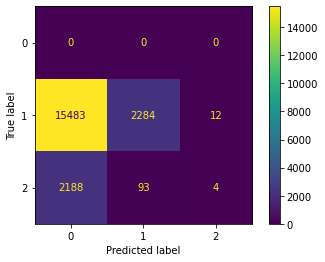

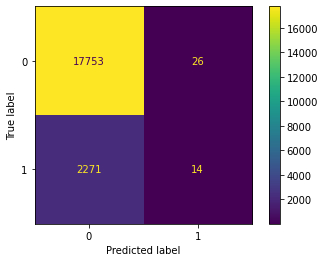

In [77]:
import warnings
warnings.filterwarnings('ignore')

evals=CRF.evaluate(X_test,y_test,show_confusion_matrix=True)

In [73]:
preds=CRF.predict(X_test)
preds[0]

array([ 0., -1., -1., ..., -1., -1., -1.])

In [69]:
preds[2]

[array([[0.00421941, 0.67088608],
        [0.00396825, 0.67063492],
        [0.00389864, 0.6705653 ],
        [0.00226757, 0.66893424],
        [0.00447427, 0.67114094],
        [0.00199601, 0.66866267],
        [0.00209644, 0.6687631 ],
        [0.00441501, 0.67108168],
        [0.00209644, 0.6687631 ],
        [0.00399202, 0.67065868],
        [0.        , 0.66666667],
        [0.        , 0.66666667],
        [0.00208333, 0.66875   ],
        [0.00699301, 0.67365967],
        [0.        , 0.66666667],
        [0.00649351, 0.67316017],
        [0.0040404 , 0.67070707],
        [0.0020202 , 0.66868687],
        [0.        , 0.66666667],
        [0.00823045, 0.67489712],
        [0.        , 0.66666667],
        [0.        , 0.66666667],
        [0.00220751, 0.66887417],
        [0.00228311, 0.66894977],
        [0.00176367, 0.66843034],
        [0.        , 0.66666667],
        [0.0020202 , 0.66868687],
        [0.00416667, 0.67083333],
        [0.00396825, 0.67063492],
        [0.002

In [48]:
np.arange(1,20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])